(2,) (1,)


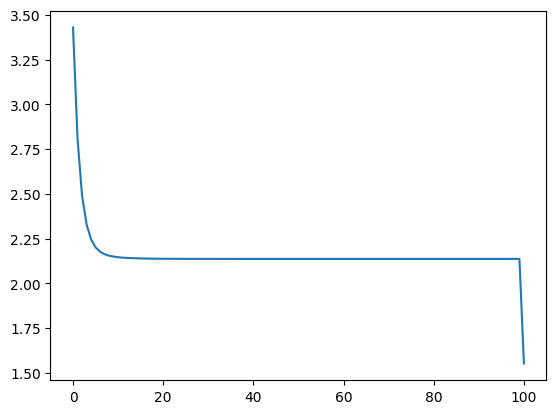

In [8]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

np.random.seed(2022)
tao = 0.1
eta = 0.9

def f(x):
    return x

def df(x):
    return np.full_like(x, 1)

def get_energy(A_model, B_model, C_model, sigma_x, sigma_y, x_estimate, y, u, prev_k_x_estimate):

    t1 = (1 / 2) * np.transpose( y - C_model @ f(x_estimate) ) @ sigma_y @ ( y - C_model @ f(x_estimate) )

    t2 = (1 / 2) * np.transpose( x_estimate - A_model @ f(prev_k_x_estimate) - B_model @ u ) @ sigma_x @ ( x_estimate - A_model @ f(prev_k_x_estimate) - B_model @ u )

    return t1 + t2


latent_dimension        = 4
observation_dimension   = 2
control_dimension       = 1

# Dynamics Matrix: Latent State to Latent State
A_model = np.random.rand(latent_dimension, latent_dimension)

# Control Matrix: Maps from Control to Latent
B_model = np.random.rand(latent_dimension, control_dimension)

# Observation Matrix: Map from Latent to Observations
C_model = np.random.rand(observation_dimension, latent_dimension)

# Non Leanred Covarience
sigma_x = np.eye(latent_dimension)
sigma_y = np.eye(observation_dimension)

# z_0 
x_prev = np.random.rand(latent_dimension)

# Sample Obs and control
o = np.random.rand(2)
u = np.random.rand(1)

print(o.shape, u.shape)

qx = [np.zeros(latent_dimension)]
vfes = []

# Relaxed the vfe with respect to x

inference_iterations = 100

for i in range(inference_iterations):

    e_y = inv(sigma_y) @ ( o - C_model @ f(qx[-1]) )

    e_x = inv(sigma_x) @ ( qx[-1] - A_model @ f(x_prev) - B_model @ u)

    qx_grad = - e_x + np.multiply(df(qx[-1]), np.transpose(C_model) @ e_y)

    qx.append(qx[-1] +  0.1 * qx_grad)

    vfe = get_energy(A_model, B_model, C_model, sigma_x, sigma_y, qx[-1], o, u, x_prev)

    vfes.append(vfe)

# A - this is not right
dA = np.reshape(inv(sigma_x) @ ( qx[-1] - A_model @ f(x_prev) - B_model @ u), (4, 1)) @ np.reshape(f(x_prev), (1, 4))
# B
dB = np.reshape(inv(sigma_x) @ ( qx[-1] - A_model @ f(x_prev) - B_model @ u), (4, 1)) @ np.reshape(u, (1, 1))
# C
dC = eta * np.reshape(inv(sigma_y) @ ( o - C_model @ f(qx[-1])), (2, 1)) @ np.reshape(f(qx[-1]), (1, 4))

A_model = A_model + tao * dA 
B_model = B_model + tao * dB 
C_model = C_model + tao * dC

vfes.append(get_energy(A_model, B_model, C_model, sigma_x, sigma_y, qx[-1], o, u, x_prev))

plt.plot(vfes)
plt.show()

# --- Predice the observations in the next time step ---

u_k_plus_1 = np.random.rand(1)

x_k = qx[-1]

x_k_plus_1 = A_model @ f(x_k) + B_model @ u_k_plus_1

y_k_plus_1 = C_model @ f(x_k_plus_1)

# --- Compute the EFE here ---

# --- Define dist based on the boltzman kaka ---

# Learning the CartPole Environment

In [13]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

np.random.seed(2022)
tao = 0.1
eta = 0.9

def f(x):
    return x

def df(x):
    return np.full_like(x, 1)

def get_energy(A_model, B_model, C_model, sigma_x, sigma_y, x_estimate, y, u, prev_k_x_estimate):

    t1 = (1 / 2) * np.transpose( y - C_model @ f(x_estimate) ) @ sigma_y @ ( y - C_model @ f(x_estimate) )

    t2 = (1 / 2) * np.transpose( x_estimate - A_model @ f(prev_k_x_estimate) - B_model @ u ) @ sigma_x @ ( x_estimate - A_model @ f(prev_k_x_estimate) - B_model @ u )

    return t1 + t2


latent_dimension        = 4
observation_dimension   = 5
control_dimension       = 1

# Dynamics Matrix: Latent State to Latent State
A_model = np.random.rand(latent_dimension, latent_dimension)

# Control Matrix: Maps from Control to Latent
B_model = np.random.rand(latent_dimension, control_dimension)

# Observation Matrix: Map from Latent to Observations
C_model = np.random.rand(observation_dimension, latent_dimension)

# Non Leanred Covarience
sigma_x = np.eye(latent_dimension)
sigma_y = np.eye(observation_dimension)

# z_0 
x_prev = np.random.rand(latent_dimension)

# Sample Obs and control
o = np.random.rand(observation_dimension)
u = np.random.rand(control_dimension)

print(o.shape, u.shape)

qx = [np.zeros(latent_dimension)]
vfes = []

# Relaxed the vfe with respect to x

inference_iterations = 10

for i in range(inference_iterations):

    e_y = inv(sigma_y) @ ( o - C_model @ f(qx[-1]) )

    e_x = inv(sigma_x) @ ( qx[-1] - A_model @ f(x_prev) - B_model @ u)

    qx_grad = - e_x + np.multiply(df(qx[-1]), np.transpose(C_model) @ e_y)

    qx.append(qx[-1] +  0.1 * qx_grad)

    vfe = get_energy(A_model, B_model, C_model, sigma_x, sigma_y, qx[-1], o, u, x_prev)

    vfes.append(vfe)

# A - this is not right
dA = np.reshape(inv(sigma_x) @ ( qx[-1] - A_model @ f(x_prev) - B_model @ u), (latent_dimension, 1)) @ np.reshape(f(x_prev), (1, latent_dimension))
# B
dB = np.reshape(inv(sigma_x) @ ( qx[-1] - A_model @ f(x_prev) - B_model @ u), (latent_dimension, 1)) @ np.reshape(u, (1, 1))
# C
dC = eta * np.reshape(inv(sigma_y) @ ( o - C_model @ f(qx[-1])), (2, 1)) @ np.reshape(f(qx[-1]), (1, 4))

A_model = A_model + tao * dA 
B_model = B_model + tao * dB 
C_model = C_model + tao * dC

vfes.append(get_energy(A_model, B_model, C_model, sigma_x, sigma_y, qx[-1], o, u, x_prev))

plt.plot(vfes)
plt.show()

(5,) (1,)


ValueError: cannot reshape array of size 5 into shape (2,1)

In [81]:
us = [0, 1, 2]

for u in us:

    obs, _ = env.reset(seed=2024)

    x_prev = np.zeros(latent_dimension)

    o = np.reshape(obs, (2,))
    u = np.reshape(u, (1,))

    # Relaxed the vfe with respect to x

    inference_iterations = 150

    for i in range(inference_iterations):

        e_y = inv(sigma_y) @ ( o - C_model @ f(qx[-1]) )

        e_x = inv(sigma_x) @ ( qx[-1] - A_model @ f(x_prev) - B_model @ u)

        qx_grad = - e_x + np.multiply(df(qx[-1]), np.transpose(C_model) @ e_y)

        qx.append(qx[-1] +  0.1 * qx_grad)

        vfe = get_energy(A_model, B_model, C_model, sigma_x, sigma_y, qx[-1], o, u, x_prev)

        vfes.append(vfe)

    # A - this is not right
    dA = eta * np.reshape(inv(sigma_x) @ ( qx[-1] - A_model @ f(x_prev) - B_model @ u), (4, 1)) @ np.reshape(f(x_prev), (1, 4))
    # B
    dB = eta * np.reshape(inv(sigma_x) @ ( qx[-1] - A_model @ f(x_prev) - B_model @ u), (4, 1)) @ np.reshape(u, (1, 1))
    # C
    dC = eta * np.reshape(inv(sigma_y) @ ( o - C_model @ f(qx[-1])), (2, 1)) @ np.reshape(f(qx[-1]), (1, 4))

    A_model = A_model + tao * dA 
    B_model = B_model + tao * dB 
    C_model = C_model + tao * dC

    x_hat   = qx[-1]

    print('q(x)', x_hat)
    print(f'p(x| x_prev , {u[0]})', A_model @ f(x_prev) + B_model @ u)
    print()

q(x) [-0.07141627 -0.07671442 -0.10058788 -0.16356984]
p(x| x_prev , 0) [0. 0. 0. 0.]

q(x) [-0.27250926  0.1075743   0.0162508  -0.34405043]
p(x| x_prev , 1) [-0.2304751   0.14818872  0.07194585 -0.2706122 ]

q(x) [-0.47533279  0.28969772  0.13040948 -0.5299277 ]
p(x| x_prev , 2) [-0.46612794  0.29397275  0.1390381  -0.53715759]



In [36]:
import scipy.stats as stats 
from scipy.stats import entropy
import numpy as np

# def kl_mvn(to, fr):
#     """Calculate `KL(to||fr)`, where `to` and `fr` are pairs of means and covariance matrices"""
#     m_to, S_to = to
#     m_fr, S_fr = fr
    
#     d = m_fr - m_to
    
#     c, lower = scipy.linalg.cho_factor(S_fr)
#     def solve(B):
#         return scipy.linalg.cho_solve((c, lower), B)
    
#     def logdet(S):
#         return np.linalg.slogdet(S)[1]

#     term1 = np.trace(solve(S_to))
#     term2 = logdet(S_fr) - logdet(S_to)
#     term3 = d.T @ solve(d)
#     return (term1 + term2 + term3 - len(d))/2.

array([0.06349364, 0.01416735])

In [5]:
import numpy as np
import gymnasium as gym
env = gym.make('CartPole-v1')

(array([-0.04761463,  0.01466676, -0.02565676,  0.03314477], dtype=float32), {})


In [16]:
# example of the normalized xavier weight initialization
from math import sqrt
from numpy import mean
from numpy.random import rand
# number of nodes in the previous layer
n = 8
# number of nodes in the next layer
m = 8
# calculate the range for the weights
lower, upper = -(sqrt(6.0) / sqrt(n + m)), (sqrt(6.0) / sqrt(n + m))
# generate random numbers
numbers = rand(n*m)
# scale to the desired range
scaled = lower + numbers * (upper - lower)
# summarize
print(numbers.reshape(8, 8))

def init_weights(n, m):
    lower, upper = -(sqrt(6.0) / sqrt(n + m)), (sqrt(6.0) / sqrt(n + m))
    # generate random numbers
    numbers = rand(n*m)
    # scale to the desired range
    scaled = lower + numbers * (upper - lower)
    # summarize
    return scaled.reshape(n, m)

[[0.14471145 0.46341887 0.4071346  0.78209621 0.52047628 0.53670774
  0.73840042 0.69691101]
 [0.26352599 0.10022285 0.19136988 0.77588055 0.30492229 0.67706579
  0.43183501 0.93402836]
 [0.48991215 0.17019575 0.23374515 0.8392985  0.11074621 0.90185665
  0.8651833  0.81068531]
 [0.07586679 0.63599606 0.18265154 0.5690467  0.99617793 0.41641813
  0.86708375 0.90815645]
 [0.80628093 0.20071292 0.36052425 0.61976854 0.31192153 0.75896537
  0.90963286 0.7943799 ]
 [0.73592895 0.8567944  0.5372352  0.44694818 0.01365605 0.15499658
  0.99989233 0.14354352]
 [0.89061267 0.9966522  0.22807696 0.14936005 0.40026877 0.73075223
  0.71035616 0.07277476]
 [0.51320164 0.0612331  0.85862155 0.35182555 0.10741593 0.97887004
  0.61478461 0.71200224]]
